In [24]:
import numpy as np
import pandas as pd
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score 
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

In [22]:
df = pd.read_csv('creditcard.csv')
legitimate = df[df.Class == 0]
fraud = df[df.Class == 1]
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


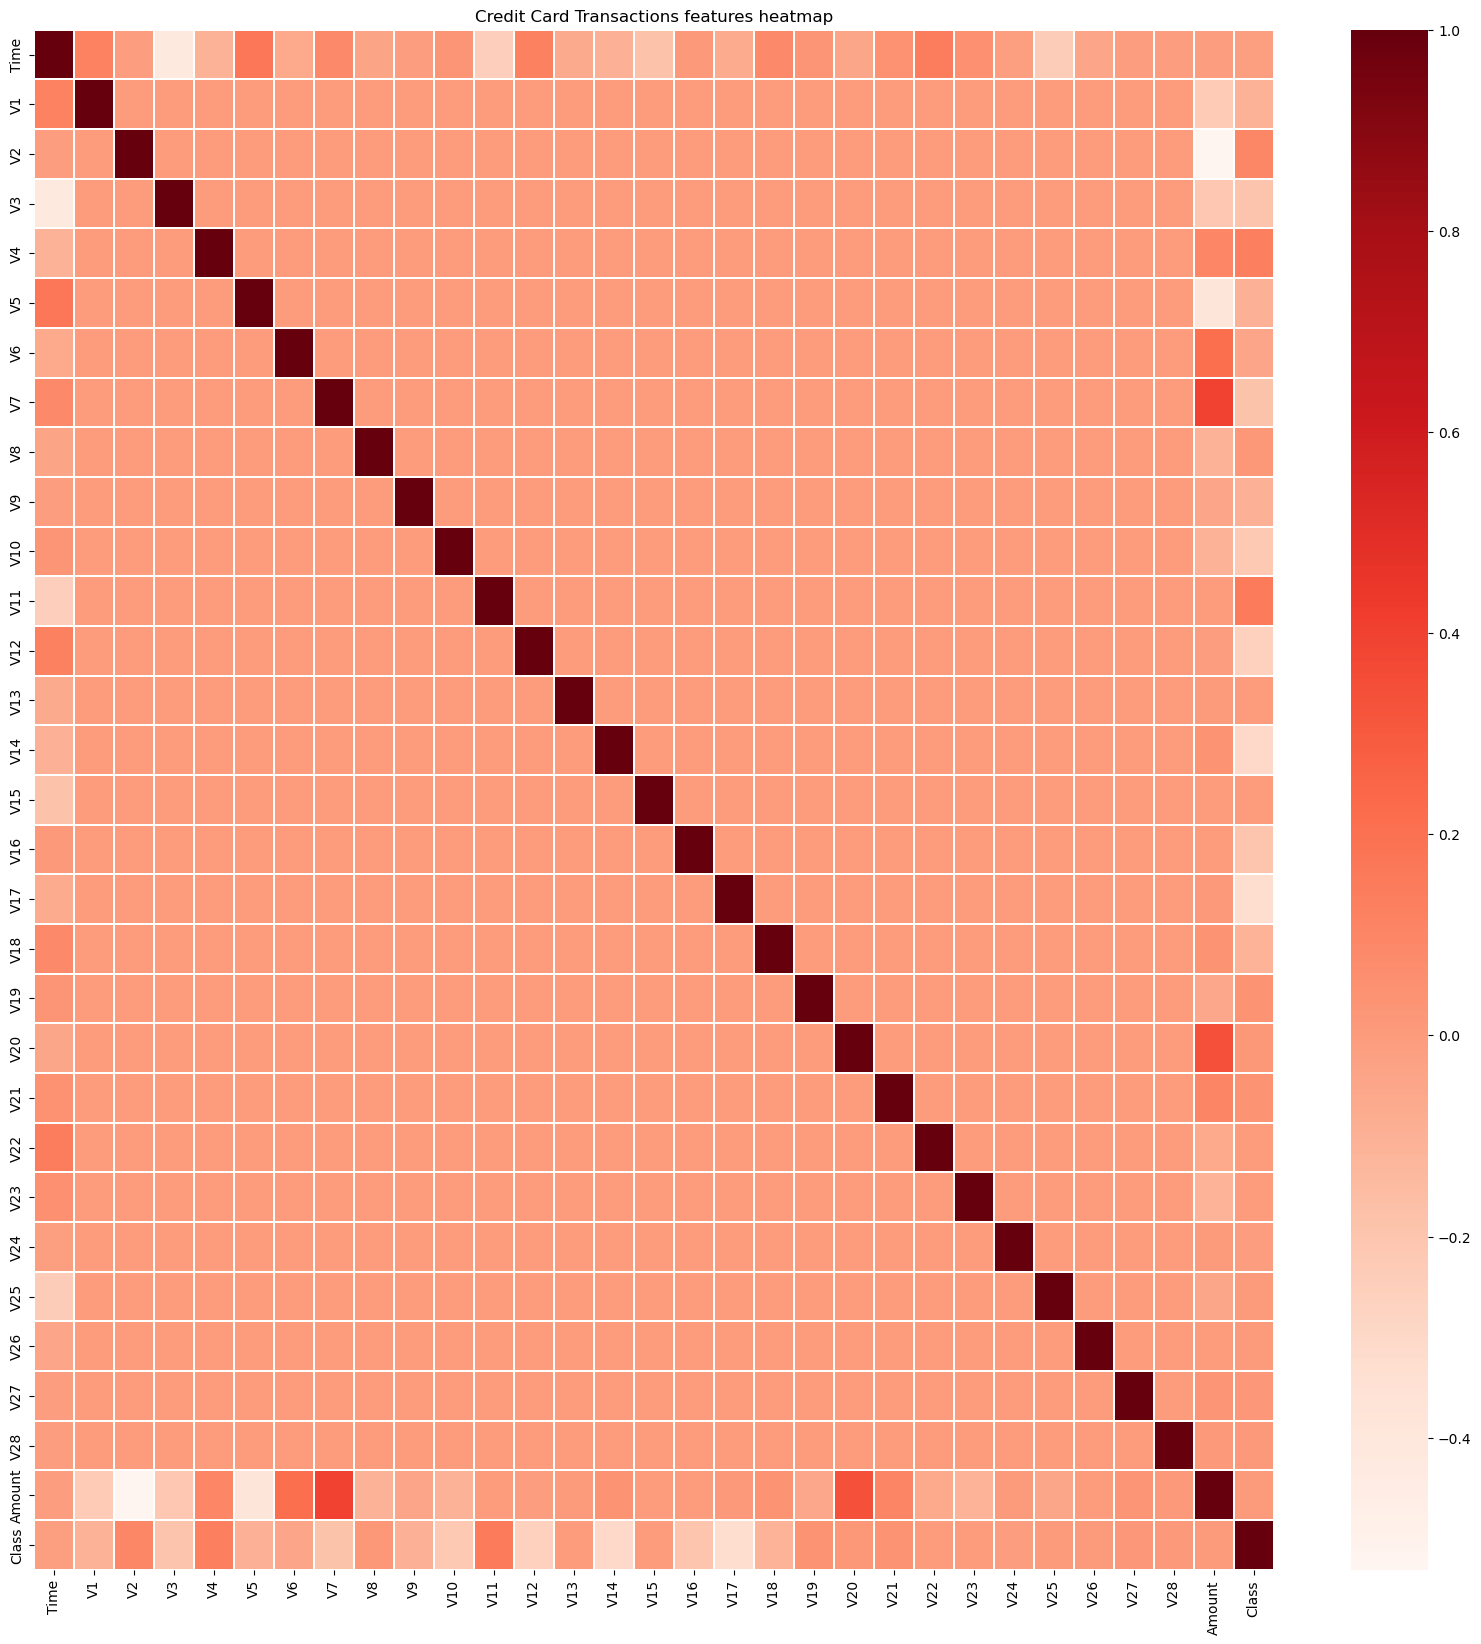

In [25]:
plt.figure(figsize = (20,20))
plt.title('Credit Card Transactions features heatmap')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [26]:
clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.01), random_state=42)
clf.fit(legitimate)
outliers = clf.predict(legitimate)
l_outliers_df = legitimate.iloc[outliers == -1]
clean_legit = legitimate.iloc[outliers == 1]

clf.fit(fraud)
outliers = clf.predict(fraud)
f_outliers_df = fraud.iloc[outliers == -1]
clean_fraud = fraud.iloc[outliers == 1]

clean_df = pd.concat([clean_fraud, clean_legit])
clean_df['Class'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0    281471
1       488
Name: Class, dtype: int64

In [8]:
X = clean_df.drop('Class', axis=1)
y = clean_df['Class']
smote = SMOTE(sampling_strategy=0.05)
X_resampled, y_resampled = smote.fit_resample(X, y)
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
df_resampled['Class'].value_counts()

0    281471
1     14073
Name: Class, dtype: int64

In [9]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']
train_df, test_df = train_test_split(df_resampled, test_size=0.2, random_state=2018, shuffle=True)
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=2018, shuffle=True)

### Random Forest

In [19]:
model = RandomForestClassifier(n_jobs=4, random_state=2018, criterion='gini', n_estimators=100,
                            verbose=False)
model.fit(train_df[predictors], train_df[target].values)
predictions = model.predict(valid_df[predictors])
auc_score = roc_auc_score(valid_df[target].values, predictions)
print("AUC Score = ", auc_score)
print("Confusion Matrix: ", confusion_matrix(valid_df[target].values, predictions))
print("Accuracy: ", accuracy_score(valid_df[target].values, predictions))
print("Recall ", recall_score(valid_df[target].values, predictions))
print("Precision", precision_score(valid_df[target].values, predictions))
print("f1: ", f1_score(valid_df[target].values, predictions))

AUC Score =  0.9821334401993348
Confusion Matrix:  [[45041     3]
 [   80  2163]]
Accuracy:  0.9982447607164759
Recall  0.9643334819438253
Precision 0.9986149584487535
f1:  0.9811748695849399


### AdaBoost

In [20]:
model = AdaBoostClassifier(random_state=2018, algorithm='SAMME.R', learning_rate=0.8, n_estimators=100)
model.fit(train_df[predictors], train_df[target].values)
predictions = model.predict(valid_df[predictors])
auc_score = roc_auc_score(valid_df[target].values, predictions)
print("AUC Score = ", auc_score)
print("Confusion Matrix: ", confusion_matrix(valid_df[target].values, predictions))
print("Accuracy: ", accuracy_score(valid_df[target].values, predictions))
print("Recall ", recall_score(valid_df[target].values, predictions))
print("Precision", precision_score(valid_df[target].values, predictions))
print("f1: ", f1_score(valid_df[target].values, predictions))

AUC Score =  0.9683246752974246
Confusion Matrix:  [[45022    22]
 [  141  2102]]
Accuracy:  0.9965529638166938
Recall  0.937137761925992
Precision 0.9896421845574388
f1:  0.9626746049919854


### XGBClassifier

In [27]:
clf = XGBClassifier(n_jobs=4, random_state=2018, objective='binary:logistic', n_estimators=100)
clf.fit(train_df[predictors], train_df[target].values)
preds = clf.predict(valid_df[predictors])
auc_score = roc_auc_score(valid_df[target].values, predictions)
print("AUC Score = ", auc_score)
print("Confusion Matrix: ", confusion_matrix(valid_df[target].values, predictions))
print("Accuracy: ", accuracy_score(valid_df[target].values, predictions))
print("Recall ", recall_score(valid_df[target].values, predictions))
print("Precision", precision_score(valid_df[target].values, predictions))
print("f1: ", f1_score(valid_df[target].values, predictions))

AUC Score =  0.9683246752974246
Confusion Matrix:  [[45022    22]
 [  141  2102]]
Accuracy:  0.9965529638166938
Recall  0.937137761925992
Precision 0.9896421845574388
f1:  0.9626746049919854


### Logistic Regression

In [28]:
clf = LogisticRegression()
clf.fit(train_df[predictors], train_df[target].values)
preds = clf.predict(valid_df[predictors])
auc_score = roc_auc_score(valid_df[target].values, predictions)
print("AUC Score = ", auc_score)
print("Confusion Matrix: ", confusion_matrix(valid_df[target].values, predictions))
print("Accuracy: ", accuracy_score(valid_df[target].values, predictions))
print("Recall ", recall_score(valid_df[target].values, predictions))
print("Precision", precision_score(valid_df[target].values, predictions))
print("f1: ", f1_score(valid_df[target].values, predictions))

AUC Score =  0.9683246752974246
Confusion Matrix:  [[45022    22]
 [  141  2102]]
Accuracy:  0.9965529638166938
Recall  0.937137761925992
Precision 0.9896421845574388
f1:  0.9626746049919854
